2024-04-17 01:21:08.731925: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/Users/artemkostylev/Library/Mobile Documents/com~apple~CloudDocs/PROJECTS/ВВИТ/Семестр 2/Lab4-TensorFlow/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8782 - loss: 0.4335
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9650 - loss: 0.1202
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9779 - loss: 0.0781
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9823 - loss: 0.0582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0429
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9728 - loss: 0.0934
Точность модели на тестовом наборе данных: 0.9764999747276306


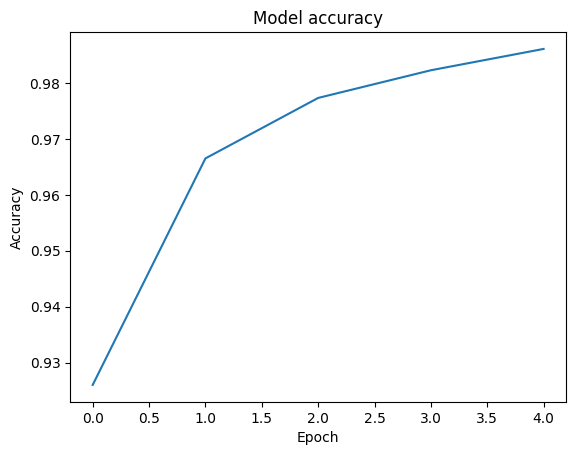

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import ssl
from tensorflow.keras.datasets import mnist

# Фикс ошибки с SSL сертификатами
ssl._create_default_https_context = ssl._create_unverified_context


# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')

# Предобработка данных
x_train, x_test = x_train / 255.0, x_test / 255.0

# Создание нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=5)

# Оценка качества модели
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точность модели на тестовом наборе данных: {test_accuracy}')

# Анализ результатов
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()